## GRIP MAY'21
## TASK 2 -> Prediction Using Unsupervised Machine Learning
Dataset-> https://bit.ly/3kXTdox

In [1]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

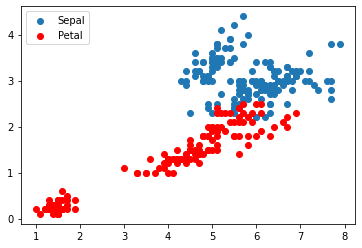

In [6]:
plt.scatter(df.SepalLengthCm,df.SepalWidthCm,label='Sepal')
plt.scatter(df.PetalLengthCm,df.PetalWidthCm,color = 'red',label = 'Petal')
plt.legend()

## Calculating vlaue of K using Elbow plot

In [7]:
x = df.iloc[:,1:5].values  ## storing training data in numpy array
SSE = [] 
rng = range(1,df.shape[1])
for i in rng:
    res = KMeans(n_clusters=i)
    res.fit(x)
    SSE.append(res.inertia_)

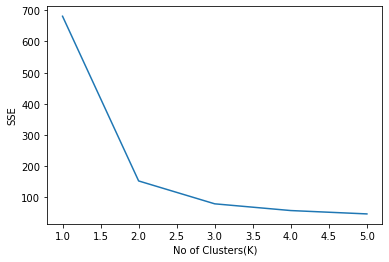

In [8]:
plt.xlabel('No of Clusters(K)')
plt.ylabel('SSE')
plt.plot(rng,SSE)

## From here we can concliude that K = 3

In [9]:
km = KMeans(n_clusters=3)
res = km.fit_predict(x)      #predicting clusters witk K=3

In [10]:
df['predicted'] = res

In [11]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,predicted
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [12]:
df0 = df[df.predicted==0]
df1 = df[df.predicted==1]
df2 = df[df.predicted==2]

## Plot for Petals

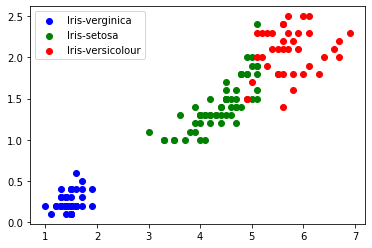

In [13]:
plt.scatter(df0.PetalLengthCm,df0.PetalWidthCm,color='blue',label= 'Iris-verginica')
plt.scatter(df1.PetalLengthCm,df1.PetalWidthCm,color='green',label = 'Iris-setosa')
plt.scatter(df2.PetalLengthCm,df2.PetalWidthCm,color='red',label = 'Iris-versicolour')
plt.legend()

## Plot for Sepals

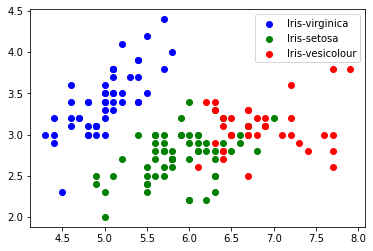

In [14]:
plt.scatter(df0.SepalLengthCm,df0.SepalWidthCm,color='blue',label = 'Iris-virginica')
plt.scatter(df1.SepalLengthCm,df1.SepalWidthCm,color='green',label = 'Iris-setosa')
plt.scatter(df2.SepalLengthCm,df2.SepalWidthCm,color='red',label = 'Iris-vesicolour')
plt.legend()